A Convolutional Neural Network (CNN) is a type of deep learning algorithm designed to process data with a grid-like structure, such as images. It is particularly effective for tasks like image classification, object detection, and computer vision.
 CNNs use convolutional layers to automatically extract features from input data, making them highly efficient and reducing the need for manual feature engineering.
 They are a subset of neural networks and play a crucial role in modern AI applications.

In [170]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


In [98]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [100]:
X_test.shape

(10000, 32, 32, 3)

In [102]:
X_train.shape

(50000, 32, 32, 3)

In [104]:
y_train.shape

(50000, 1)

In [106]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [108]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [110]:
y_test = y_test.reshape(-1,)

In [112]:
classes = ['airplane', 'automobile','bird', 'car', 'deer', 'dog','frog','horse', 'ship','truck']

In [114]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

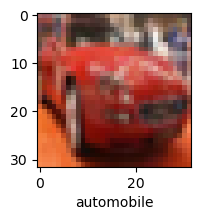

In [116]:
plot_sample(X_train, y_train, 5)

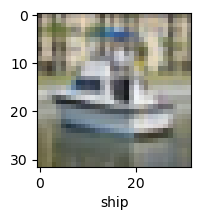

In [118]:
plot_sample(X_train, y_train, 501)

In [120]:
X_train= X_train / 255.0
X_test = X_test / 255.0

In [122]:
from keras.models import Sequential
from keras import layers

ann = Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


C:\ananconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.3043 - loss: 1.9335
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.4203 - loss: 1.6460
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.4505 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.4725 - loss: 1.4926
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.4960 - loss: 1.4393


In [124]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report:\n', classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.72      0.53      1000
           1       0.55      0.68      0.61      1000
           2       0.31      0.52      0.39      1000
           3       0.35      0.42      0.38      1000
           4       0.47      0.29      0.36      1000
           5       0.58      0.18      0.27      1000
           6       0.56      0.48      0.52      1000
           7       0.58      0.50      0.54      1000
           8       0.68      0.51      0.58      1000
           9       0.59      0.47      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



<function matplotlib.pyplot.show(close=None, block=None)>

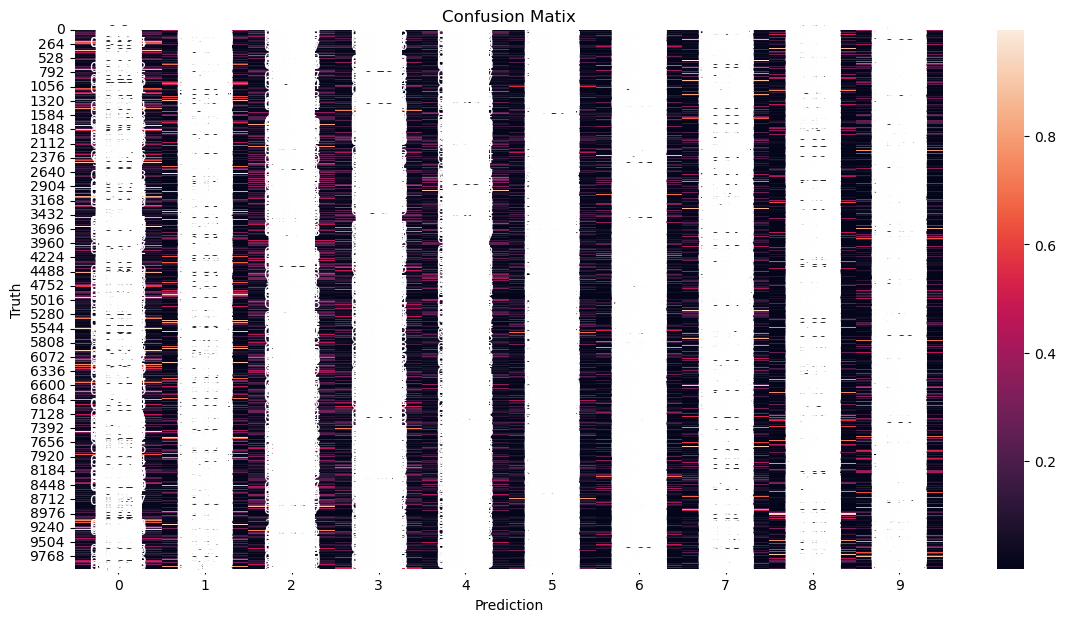

In [126]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot= True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matix')
plt.show

In [139]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\ananconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
cnn.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [145]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1077 - loss: 2.3084


[2.3088395595550537, 0.10790000110864639]

In [147]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.10271311, 0.08357507, 0.10686733, 0.11210892, 0.10142373,
        0.09476683, 0.10573129, 0.10675725, 0.09412909, 0.09192738],
       [0.10708501, 0.07811528, 0.10855402, 0.10788126, 0.10933859,
        0.08923517, 0.1041874 , 0.10282401, 0.09892295, 0.09385628],
       [0.1096458 , 0.07863203, 0.10584792, 0.10929449, 0.10591918,
        0.09456792, 0.10238351, 0.10342169, 0.09707511, 0.09321234],
       [0.10946222, 0.07598145, 0.10951789, 0.10984822, 0.10728195,
        0.09309307, 0.10216524, 0.10352863, 0.09636864, 0.0927527 ],
       [0.10863747, 0.07842634, 0.1035844 , 0.11102128, 0.10284895,
        0.09854005, 0.10107708, 0.10684927, 0.09529845, 0.09371681]],
      dtype=float32)

In [149]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 4, 0, 3, 3]

In [151]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

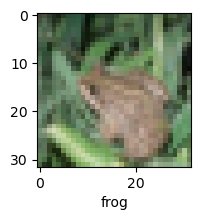

In [153]:
plot_sample(X_test, y_test, 4)

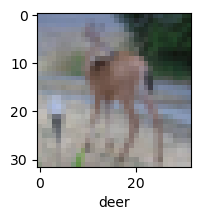

In [155]:
plot_sample(X_test, y_test, 100)

In [167]:
classes[y_classes[1]]

'deer'